In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pd.__version__

'2.3.1'

**This is the second homework and we begin by doing exploratory data analysis**

In [4]:
data_f = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [5]:
!wget $data_f

--2025-10-08 10:51:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.004s  

2025-10-08 10:51:10 (194 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [6]:
df = pd.read_csv(data_f)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['origin', 'fuel_type', 'drivetrain']

In [8]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    df[col] = df[col].str.replace('-','_')

In [9]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all_wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front_wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front_wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all_wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all_wheel_drive,2.0,12.488369


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

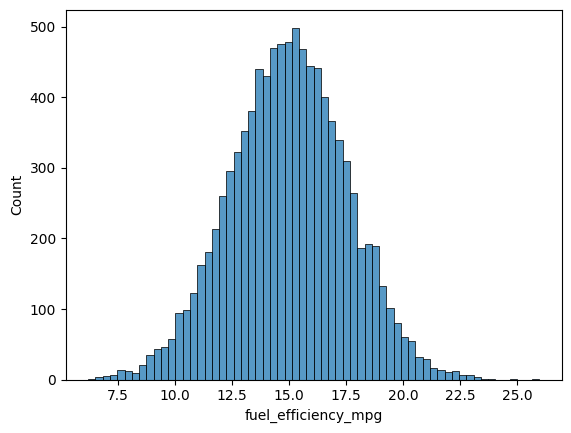

In [11]:
sns.histplot(df.fuel_efficiency_mpg)

**EDA: fuel_efficiency_column does not have a long tail**

In [12]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

**Q1. The column with missing values is 'horsepower'**

In [13]:
median_value = int(df['horsepower'].median())
median_value

149

**Q2. The median value for the varaible 'horsepower' is 149**

In [14]:
selected_col_df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
selected_col_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [15]:
#This is to split the dataset into the training data, validation data and testing data
n = len(selected_col_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [16]:
index_for_df_length = np.arange(n)

In [17]:
np.random.seed(42)
np.random.shuffle(index_for_df_length)

In [18]:
#this is used to shuffle the dataset to ensure it's random
df_shuffled = selected_col_df.iloc[index_for_df_length]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [19]:
#this drops and resets the index column because it's not needed in training
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,15.804354
1,210,136.0,3001.227490,2004,14.272374
2,210,152.0,3747.467392,2021,11.748441
3,190,128.0,2705.833636,2014,16.485991
4,230,156.0,2505.939657,2005,17.779704
...,...,...,...,...,...
1935,210,163.0,1972.029124,2011,19.961672
1936,160,126.0,3011.588014,2009,14.651056
1937,290,187.0,2440.508039,2019,18.404435
1938,260,129.0,1865.404480,2019,20.502460


In [20]:
#This chages the values of the target variable to enbale it be in a format better for modeling
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [23]:
X_train = df_train.values

In [24]:
#this is to train the features with the linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
#handling missing values, two versions, fill one with Zero and the other with the mean
df_train_fill_with_zero = df_train.fillna(0)
df_train_fill_with_mean = df_train.fillna(df_train['horsepower'].mean())

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [34]:
X_train_with_zero = df_train_fill_with_zero.values 
X_train_with_mean = df_train_fill_with_mean.values 

In [37]:
#this is to train the model
w0, w = train_linear_regression(X_train_with_zero, y_train)
w0_mean, w_mean = train_linear_regression(X_train_with_mean, y_train)

In [40]:
#this is to get the prediction
y_pred_with_zero = w0 + X_train_with_zero.dot(w)
y_pred_with_mean = w0_mean + X_train_with_mean.dot(w_mean)

<Axes: ylabel='Count'>

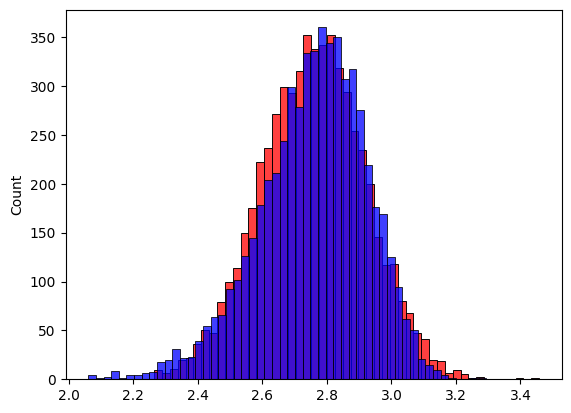

In [43]:
sns.histplot(y_pred_with_mean, color='red')
sns.histplot(y_train, color='blue')

In [44]:
#getting the root mean squared error for both models
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [52]:
rmse_with_zero = rmse(y_train, y_pred_with_zero)
rmse_with_mean = rmse(y_train, y_pred_with_mean)
rmse_with_zero

np.float64(0.039086325392652485)

**Q3. The model with the better RMSE is the one with the mean of the horsepower column**

In [61]:
#preparing the validation dataset for the columns filled with zero
def prepare_X(df):
    df_num = df[selected_col_df]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [62]:
#validating with the validation dataset
X_val_with_zero = prepare_X(df_val)
y_pred_with_zero = w0 + X_val_with_zero.dot(w)

ValueError: Boolean array expected for the condition, not int64